### EDA

#### Loading Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np

In [6]:
 x = df['Age'].median()

In [7]:
df['Age']= df['Age'].replace(np.nan, x)

In [8]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [9]:
df['Cabin'].replace(np.nan, 'Unknown',inplace=True)

C:\Users\vedant\AppData\Local\Temp\ipykernel_796\1872604217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].replace(np.nan, 'Unknown',inplace=True)


In [10]:
df['Deck']=df['Cabin'].str[0]

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\vedant\AppData\Local\Temp\ipykernel_796\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [13]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [14]:
df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=False)

In [19]:
dummy_cols = [col for col in df.columns if 'Embarked_' in col or 'Deck_' in col or 'Sex_' in col]

In [20]:
df[dummy_cols]=df[dummy_cols].astype(int)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,...,1,0,0,0,0,0,0,0,0,1


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.725028,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Histogram for numerical columns

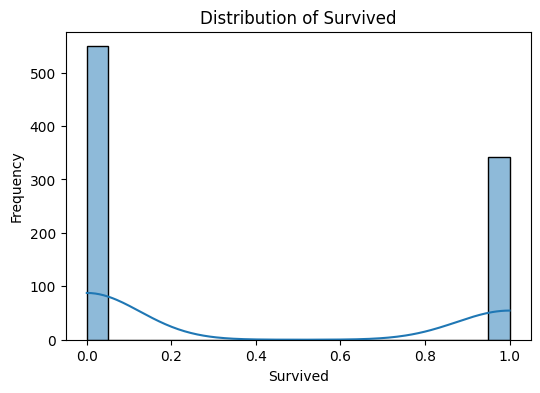

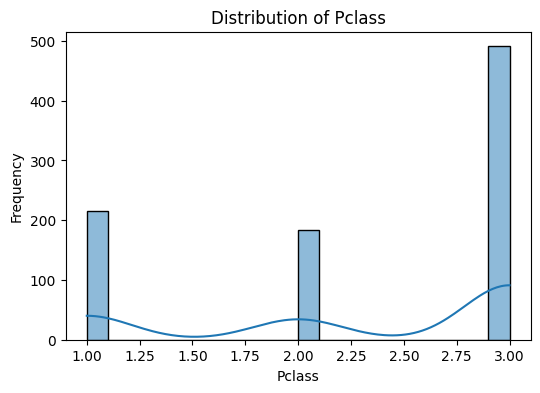

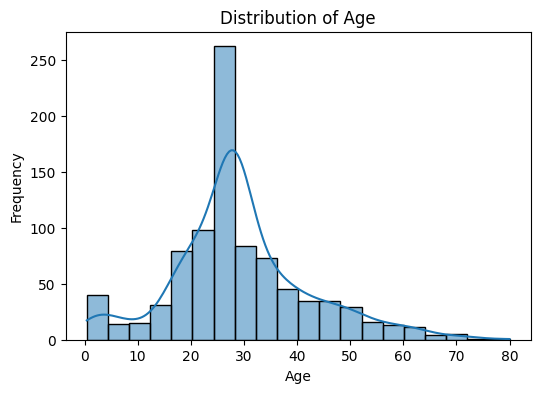

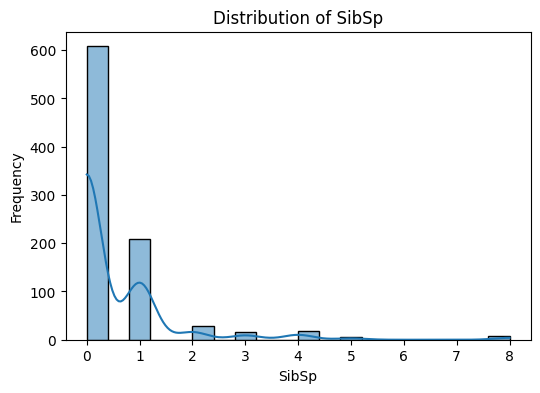

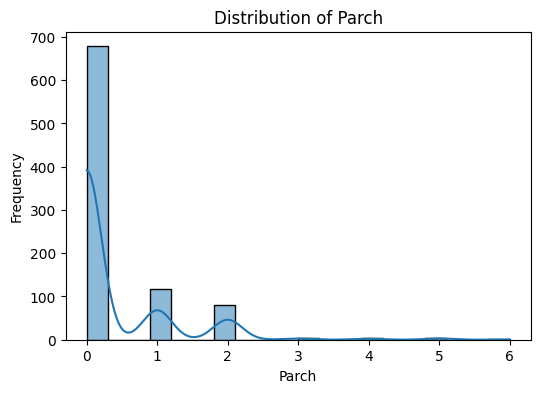

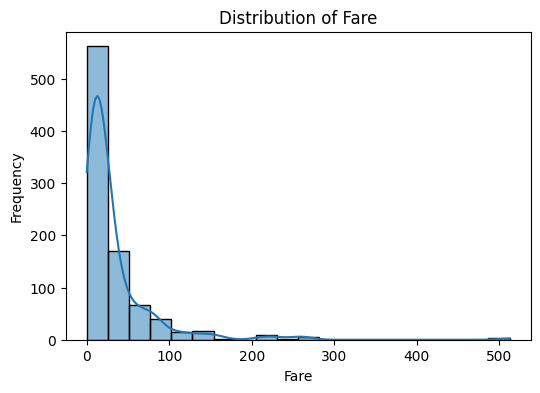

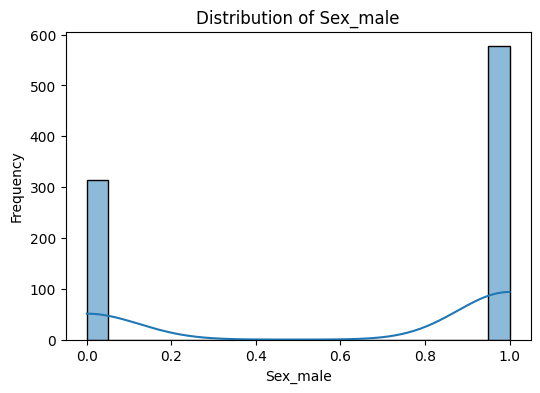

In [29]:
import seaborn as sns

cols_to_plot = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### As per the graphs, we can see that majority of the people could not survive. P-class 3 was most prominent among teh passengers.Most of the passengers belonged to the age group of 25-30 yrs with no siblings ,spouses,parents or children aboard. Maximum people paid low fares for their tickets and the no. of males on board were nearly twice the no. of females on board.

#### Boxplots for numerical columns

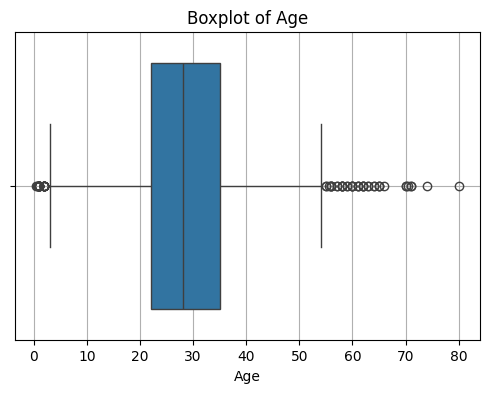

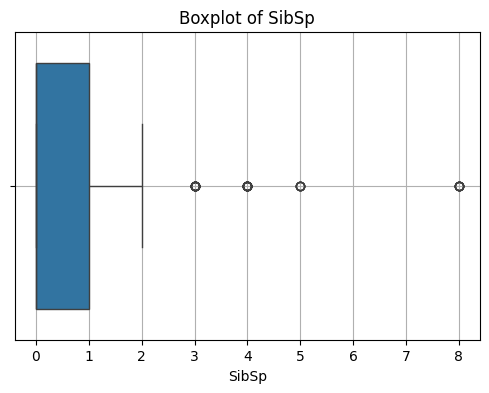

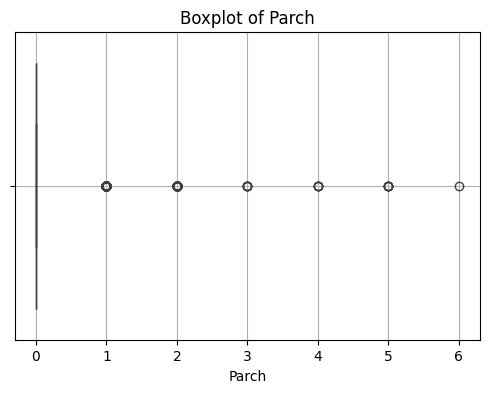

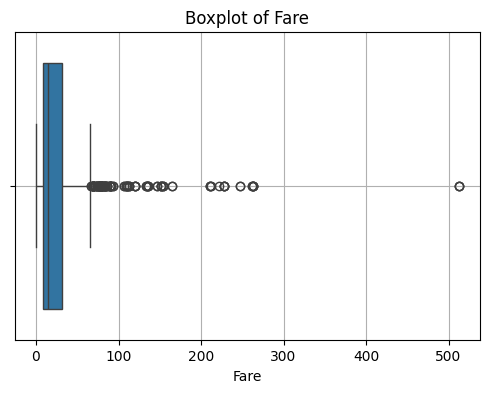

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['Age','SibSp','Parch','Fare'] 

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

#### These boxplots show that min and max ages ranged from 5-55 years with older population from 60-80 being in minority.Similarly max siblings or spouses on board are 2 ,while cases seen where the no. is greater than 2 are  the outliers.Additionally, 0 parents or children are on board with some rare cases eg. 6 children.Lastly, max fare price is below 100 where as there are some cases where the fare has been exceptionally high for eg. 500+. 

#### Correlation

In [36]:
correlation_matrix = df.select_dtypes(include='number').corr()

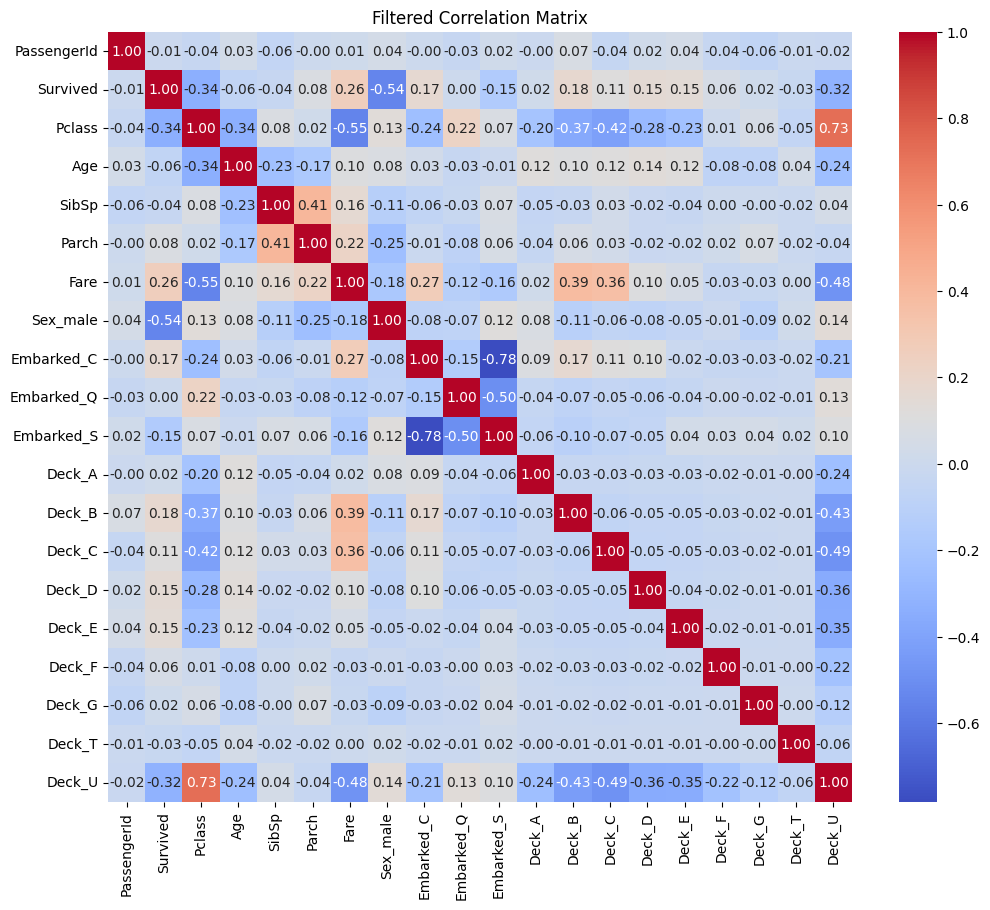

In [41]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Filtered Correlation Matrix")
plt.show()

#### As per the heatmap, we could see that Pclass,Fare,Sex_male,Embarked C and S,Deck B,D,E and U show fair correlation to variable Survived.

#### Scatterplots

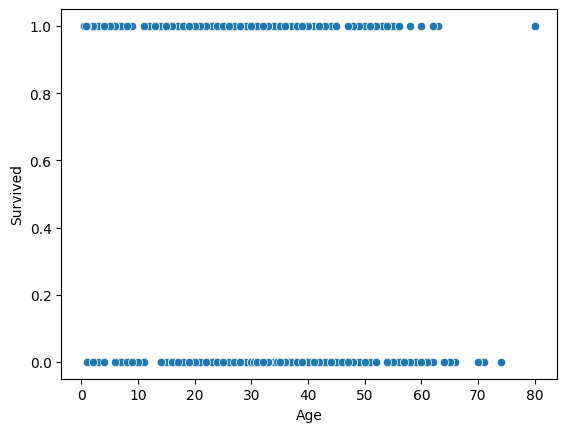

In [44]:
sns.scatterplot(x='Age', y='Survived', data=df)
plt.show()

#### As per the above graph it can be seen that there is no clear relation between age and survived variables as no clear pattern can be inferred.

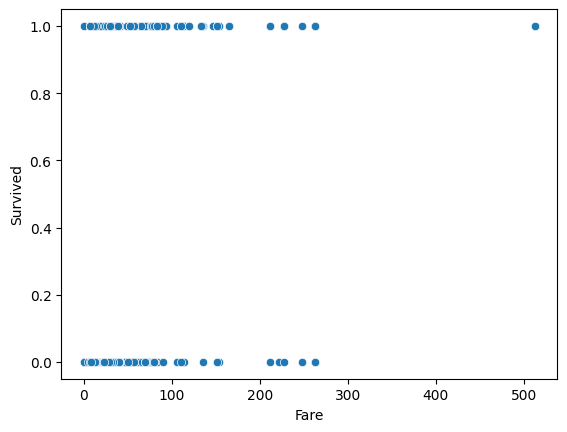

In [45]:
sns.scatterplot(x='Fare', y='Survived', data=df)
plt.show()

#### Similarly no clear pattern can be seen in the Fare vs Survived graph.

#### Bar plots for categorical columns

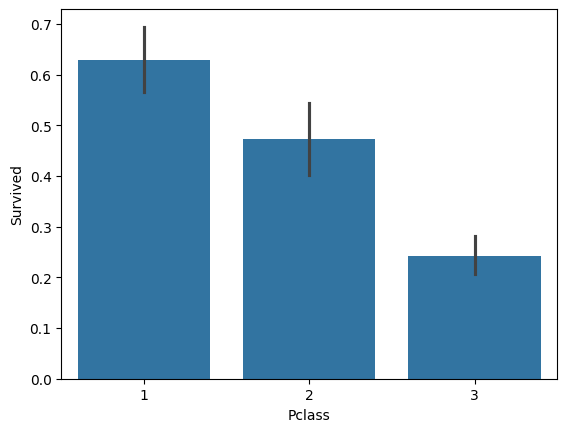

In [48]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

#### The above bar graph shows that Pclass 1 has more survival rates over others showing good correlation rates between Pclass values and survived variable.

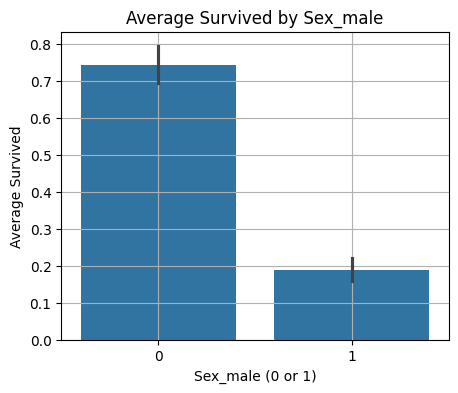

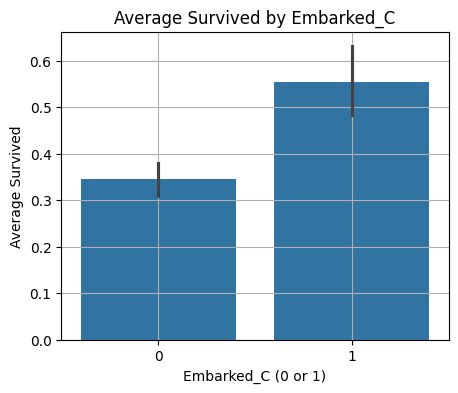

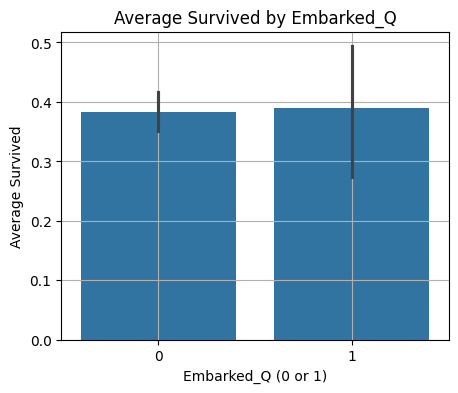

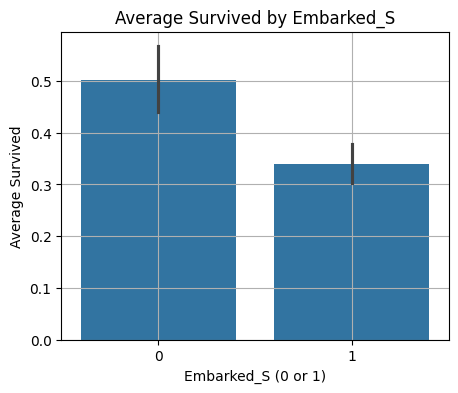

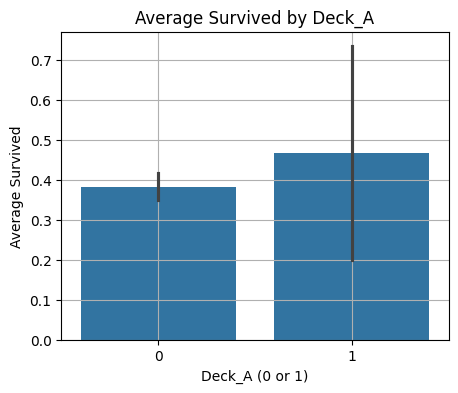

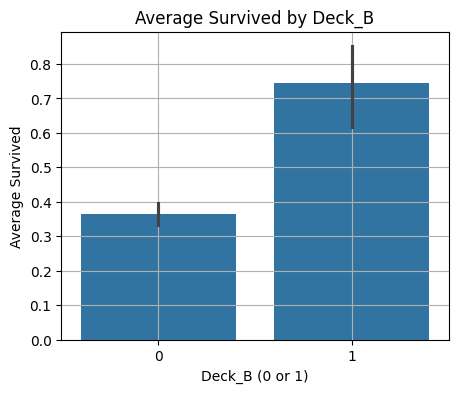

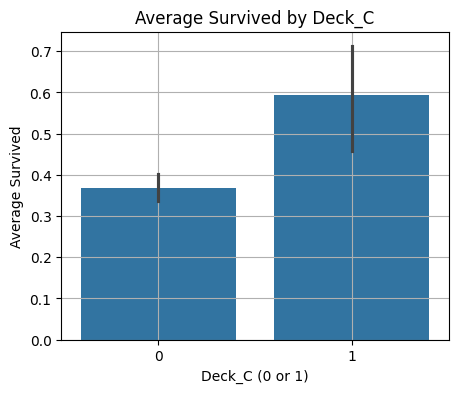

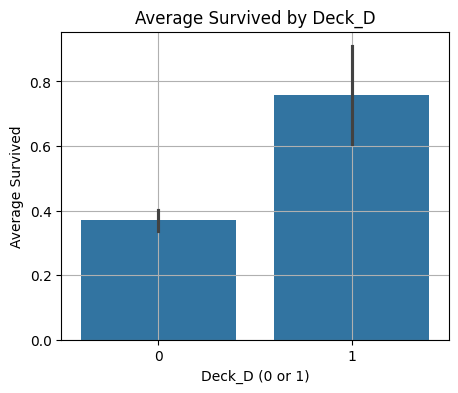

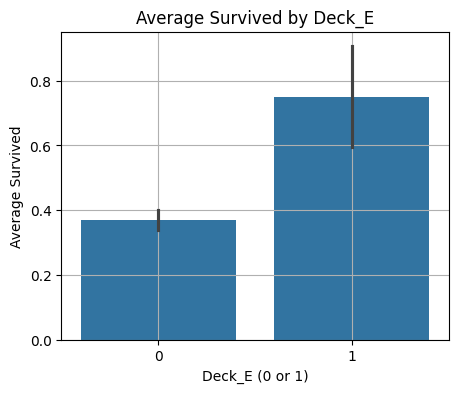

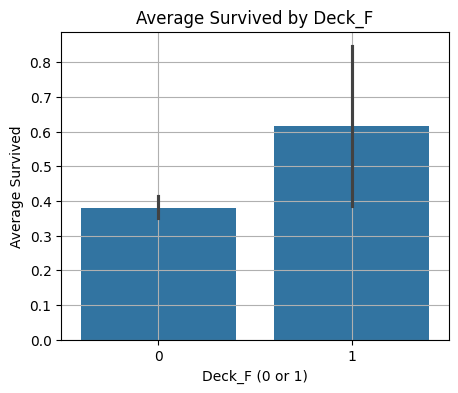

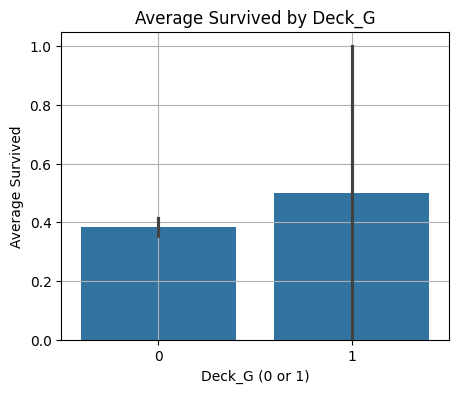

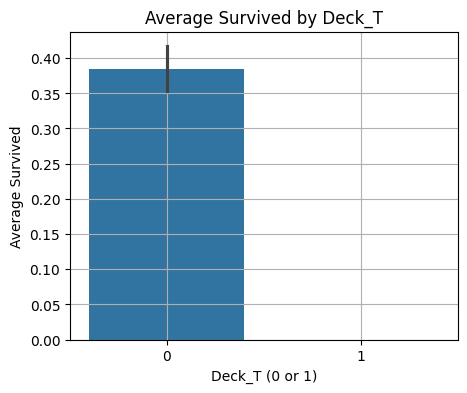

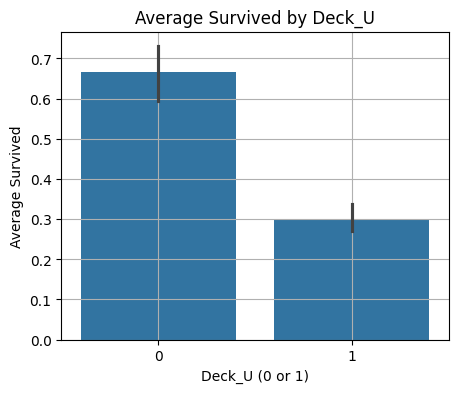

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'Survived'

for col in dummy_cols:
    plt.figure(figsize=(5, 4))
    sns.barplot(x=df[col], y=df[target])
    plt.title(f'Average {target} by {col}')
    plt.xlabel(f'{col} (0 or 1)')
    plt.ylabel(f'Average {target}')
    plt.grid(True)
    plt.show()

#### Similarly the above bar graphs do a good job in explaining survival rates per column and it can be seen that Sex_male,Embarked C and S,Deck B,D,E and U justify their high correlation values in the heatmap.As all other columns are either having similar distributions or only one value in case of Deck_T.